In [3]:
import numpy as np

In [4]:
import os
import gzip
    
def load_mnist(path, kind='train'):
    
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [5]:
X_train, y_train = load_mnist('datasets/fashion-mnist', 'train')
X_test, y_test = load_mnist('datasets/fashion-mnist', 't10k')

print("Training features: Shape -> {} \n".format(X_train.shape))
print("Training Labels: Shape -> {} \n".format(y_train.shape))
print("Test features: Shape -> {} \n".format(X_test.shape))
print("Test Labels: Shape -> {} \n".format(y_test.shape))

X_train = X_train/256
X_test = X_test/256

Training features: Shape -> (60000, 784) 

Training Labels: Shape -> (60000,) 

Test features: Shape -> (10000, 784) 

Test Labels: Shape -> (10000,) 



In [6]:
# using cross validation with folds = 10
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_clf = LogisticRegression()


In [34]:
scores = cross_val_score(lr_clf, X_train, y_train, scoring='accuracy', cv=6, verbose=1, n_jobs=-1)

print("Plain Logistic regression-> Scores: {} \n".format(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Plain Logistic regression-> Scores: [0.849  0.8459 0.8584 0.8527 0.856  0.8516] 



[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  5.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  5.9min finished


In [9]:
# plot learning curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(lr_clf, 
                                                        X_train, 
                                                        y_train, 
                                                        cv=6, 
                                                        n_jobs=-1,
                                                        train_sizes=np.linspace(.1, 1.0, 5))

AxesSubplot(0.125,0.125;0.775x0.755)


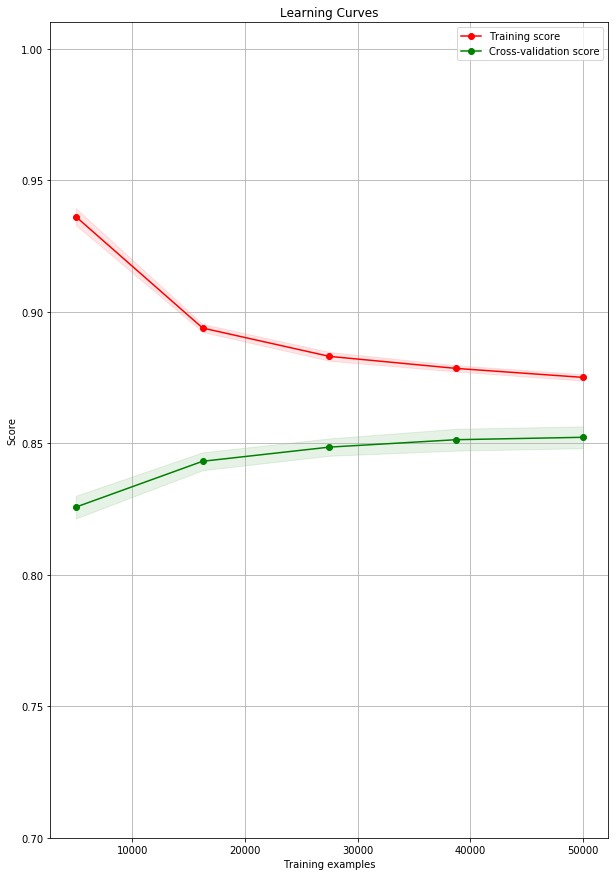

In [18]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


fig, axes = plt.subplots(1, 1, figsize=(10, 15))
axes.set_title("Learning Curves")
ylim=(0.7, 1.01)
if ylim is not None:
    axes.set_ylim(*ylim)
axes.set_xlabel("Training examples")
axes.set_ylabel("Score")

axes.grid()
axes.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1,color="r")
axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,color="g")
axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axes.legend(loc="best")

plt.show()

In [26]:
# using grid search to find approx best param values
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ('l1', 'l2'),
    'C': [0.001, 0.01, 0.1, 1.0]
}
grid_search_clf = GridSearchCV(lr_clf,param_grid, scoring='accuracy', n_jobs=-1, cv=6, verbose=1)
grid_search_clf.fit(X_train, y_train)
print("Best score: {} \n".format(grid_search_clf.best_score_))
print("Best params: {} \n".format(grid_search_clf.best_params_))

Fitting 6 folds for each of 8 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 29.8min finished
c:\users\dhruv\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dhruv\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best score: 0.8551 

Best params: {'C': 0.1, 'penalty': 'l2'} 



In [29]:
# creating model on whole training set with best params
from sklearn.metrics import accuracy_score
lr_params_clf = LogisticRegression(penalty='l2', C=0.1, random_state=1, verbose=1, n_jobs=-1)
lr_params_clf.fit(X_train, y_train)

train_predictions = lr_params_clf.predict(X_train)
print('Training set -> accuracy score: {}\n'.format(accuracy_score(y_train, train_predictions)))
test_predictions = lr_params_clf.predict(X_test)
print('Test set -> accuracy score: {}\n'.format(accuracy_score(y_test, test_predictions)))

c:\users\dhruv\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dhruv\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\dhruv\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]Training set -> accuracy score: 0.8658666666666667

Test set -> accuracy score: 0.8429



In [30]:
from sklearn.metrics import confusion_matrix
disp = confusion_matrix(y_test, test_predictions)
print(disp)

[[824   4  17  47   6   4  83   0  15   0]
 [  3 955   3  27   6   0   3   1   2   0]
 [ 20   4 737  11 139   0  77   1  11   0]
 [ 24  13  12 873  36   0  38   0   4   0]
 [  0   3 111  41 762   1  72   0  10   0]
 [  0   0   0   1   0 913   0  55   8  23]
 [145   3 132  48 111   1 529   0  31   0]
 [  0   0   0   0   0  32   0 935   1  32]
 [  4   1   4  10   2   7  13   4 955   0]
 [  0   0   0   1   0  11   0  41   1 946]]


In [33]:
import pickle
import os

if not os.path.exists('outfit_classifier'):
    os.makedirs('outfit_classifier')
pickle.dump(lr_params_clf,
            open(os.path.join('outfit_classifier', 'classifier.pkl'), 'wb'),
            protocol=4)